In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sympy.external.gmpy import bit_scan0

now we let's get load and show the image

In [3]:
def load_image(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  if img is None:
    raise ValueError("Invalid image path")
  return img

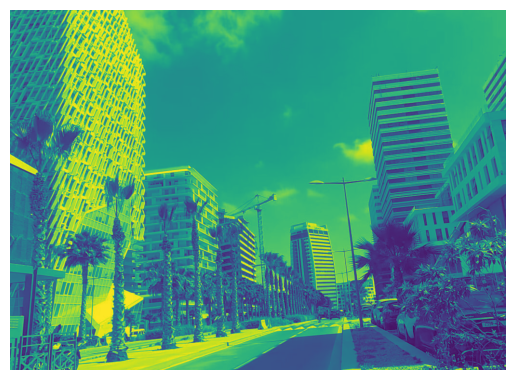

In [4]:
path = "/Users/Apple/PyCharmMiscProject/casa.jpg"
img = load_image(path)
plt.imshow(img)
plt.axis('off')
plt.show()

let's apply some downsampling to the image



In [5]:
def downsample_image(image, factor):
  new_width = image.shape[1] * factor
  new_height = image.shape[0] * factor
  downsampled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
  return downsampled_image



Display downsampled ×2 and ×4

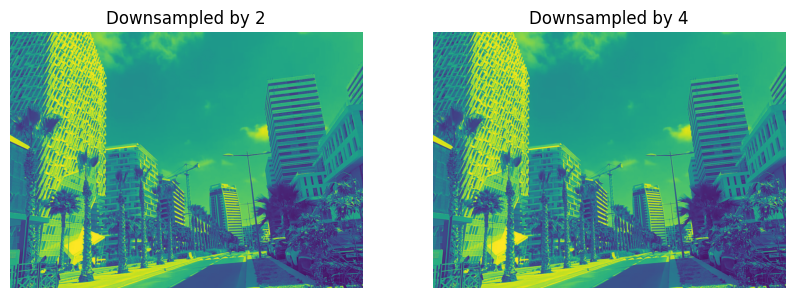

In [9]:
down_2 = downsample_image(img, 2)
down_4 = downsample_image(img, 4)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(down_2)
plt.title('Downsampled by 2')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(down_4)
plt.title('Downsampled by 4')
plt.axis('off')

plt.show()

let's now perform upsampling

In [12]:
def upsample_image(image, factor, method):
    new_width = image.shape[1] * factor
    new_height = image.shape[0] * factor
    upsampled_image = cv2.resize(image, (new_width, new_height), interpolation=method)
    return upsampled_image


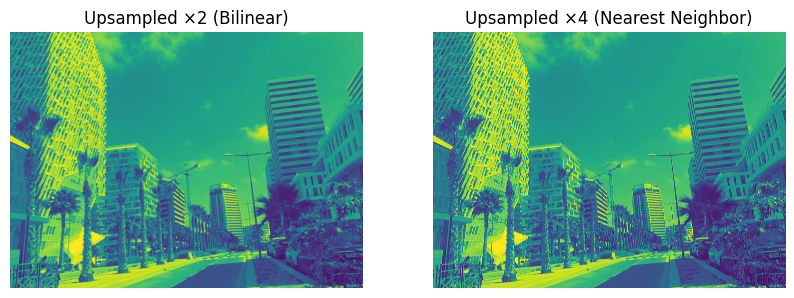

In [13]:
up_bilinear = upsample_image(down_2, 2, cv2.INTER_LINEAR)    # back to original size
up_nearest  = upsample_image(down_4, 4, cv2.INTER_NEAREST)   # back to original size

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(up_bilinear)
plt.title("Upsampled ×2 (Bilinear)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(up_nearest)
plt.title("Upsampled ×4 (Nearest Neighbor)")
plt.axis('off')

plt.show()



Quantizing bit depth (reducing number of gray levels)

In [14]:
def quantize_image(image, bits):
    levels = 2 ** bits
    step = 256 // levels
    quantized = (image // step) * step
    return quantized.astype(np.uint8)



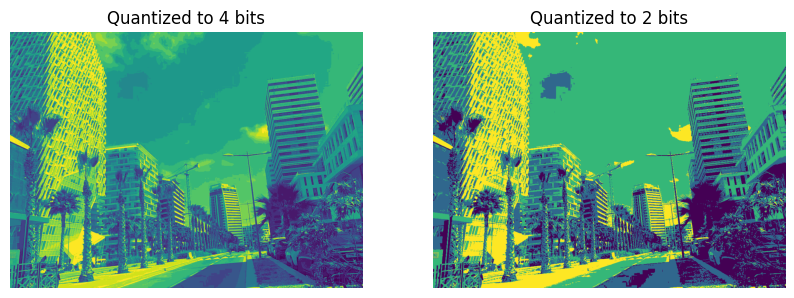

In [18]:
quant_4 = quantize_image(img, 4)
quant_2 = quantize_image(img, 2)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(quant_4)
plt.title("Quantized to 4 bits")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(quant_2)
plt.title("Quantized to 2 bits")
plt.axis('off')

plt.show()




now let's combine Sampling + Quantization


In [19]:
def downsample_and_quantize(image, down_factor, quant_bits):

    # Step 1: Downsample
    down = downsample_image(image, down_factor)

    # Step 2: Quantize
    quant = quantize_image(down, quant_bits)

    # Step 3: Upsample back to original size using bilinear interpolation
    up_factor = down_factor
    reconstructed = upsample_image(quant, up_factor, cv2.INTER_LINEAR)

    return down, quant, reconstructed



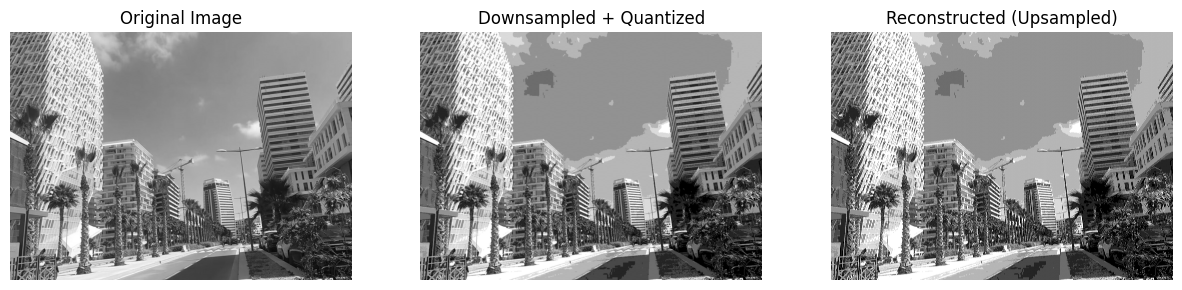

In [21]:
down, quant, recon = downsample_and_quantize(img, 4, 3)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(quant, cmap='gray')
plt.title("Downsampled + Quantized")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(recon, cmap='gray')
plt.title("Reconstructed (Upsampled)")
plt.axis('off')

plt.show()



Now let's downsamples an image then upscale it back using some interpolation methods


In [22]:
def downsample_upsample(image, down_factor, up_factor, method):
    # Step 1: Downsample
    new_w = image.shape[1]
    new_h = image.shape[0]
    down = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Step 2: Upsample
    up_w = new_w * up_factor
    up_h = new_h * up_factor
    up = cv2.resize(down, (up_w, up_h), interpolation=method)

    return down, up



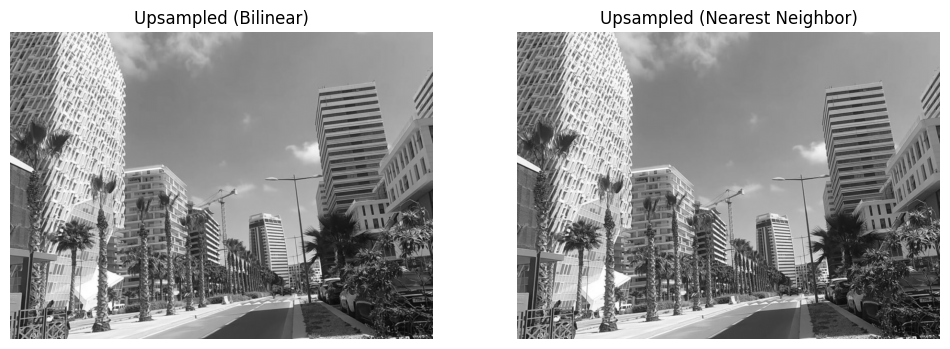

In [23]:
_, up_linear = downsample_upsample(img, down_factor=4, up_factor=4, method=cv2.INTER_LINEAR)
_, up_nearest = downsample_upsample(img, down_factor=4, up_factor=4, method=cv2.INTER_NEAREST)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(up_linear, cmap='gray')
plt.title("Upsampled (Bilinear)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(up_nearest, cmap='gray')
plt.title("Upsampled (Nearest Neighbor)")
plt.axis('off')

plt.show()



Now let's quantize the image to multiple bit depths


In [24]:
def quantize_to_bits(image, bit_list):
    results = {}
    for bits in bit_list:
        levels = 2 ** bits
        step = 256 // levels
        quantized = (image // step) * step
        results[bits] = quantized.astype(np.uint8)
    return results


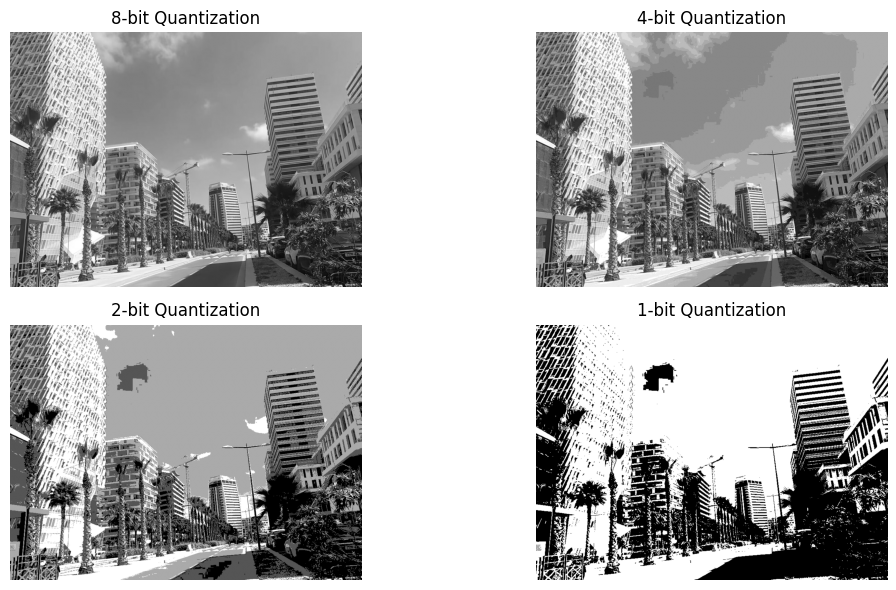

In [26]:
bit_levels = [8, 4, 2, 1]
quant_results = quantize_to_bits(img, bit_levels)

plt.figure(figsize=(12,6))

for i, bits in enumerate(bit_levels, 1):
    plt.subplot(2, 2, i)
    plt.imshow(quant_results[bits], cmap='gray')
    plt.title(f"{bits}-bit Quantization")
    plt.axis('off')

plt.tight_layout()
plt.show()

